# Einführung in die Neuroinformatik - 8. Aufgabenblatt
## Gruppe Q: Dominik Authaler, Marco Deuscher, Carolin Schindler

### Aufgabe 1: Momentum-Optimierer

#### 1. zwei Iterationen des Lernverfahrens berechnen
Iteration 1  
$m(1) = 0,9 \cdot m(0) + 4 \cdot w(0) = 0 + 4 \cdot 20 = 80$  
$w(1) = w(0) - 0,1 \cdot m(1) = 20 - 0,1 \cdot 80 = 12$  
Iteration 2  
$m(2) = 0,9 \cdot m(1) + 4 \cdot w(1) = 0,9 \cdot 80 + 4 \cdot 12 = 120$  
$w(2) = w(1) - 0,1 \cdot m(2) = 12 - 0,1 \cdot 120 = 0$

#### 2. für jeden Fall entscheiden, ob es zu einer Beschleunigung oder einer Stabilisierung des Momentumterms kommt
| Gradienten | $\frac{\partial E}{\partial w(1)} < 0$ | $\frac{\partial E}{\partial w(1)} > 0$ |  
| - | - | - |  
| $\frac{\partial E}{\partial w(0)} < 0$ | Beschleunigung | Stabilisierung |  
| $\frac{\partial E}{\partial w(0)} > 0$ | Stabilisierung | Beschleunigung |  


#### 3. verschiedene Pfade des Momentum-Optimierers
##### a) Erkläre wieso der Pfad zu weit nach unten und so zuerst etwas über das Ziel hinausgeht.
Bei der Berechnung des Momentum werden vorherige Werte mit einbezogen und somit ist die Richtungsänderung träger. Dadurch geht der Pfad zu weit nach unten.
##### b) Wieso steigt die $m_2$-Kurve zuerst an, obwohl die Updateschritte sich nach unten bewegen?
$m_2(t) = \alpha \cdot m_2(t-1) + \frac{\partial E}{\partial w_2(t-1)}$  
$\frac{\partial E}{\partial w_2(t-1)} = 20 \cdot w_2$ und ist $> 0$ für $w_2 > 0$. Da $w_2$ zu Beginn posiiv ist, steigt die $m_2$-Kurve zuerst an.  
##### c) Finde eine Einstellung, welche das Problem unerwünschter Oszillationen verdeutlicht.
https://milania.de/blog/Introduction_to_neural_network_optimizers_%5Bpart_1%5D_%E2%80%93_momentum_optimization?w1Start=-15&w2Start=20&w1Range=%5B-20%2C20%5D&w2Range=%5B-20%2C20%5D&error_function=3+*+w1+%5E+2+%2B+10+*+w2+%5E+2&iterations=100&eta=0.02&alpha=1&visible_traces=%5B0%2C1%2C2%5D#fig:MomentumOptimizer_Trajectory
##### d) Finde eine geeignete Parameterkonstellation, um in maximal 20 Iterationen einen möglichst kleinen Fehlerwert zu erreichen.
Fehler von $16,44425 \cdot 10^{-12}$ wurde erreicht:  
https://milania.de/blog/Introduction_to_neural_network_optimizers_%5Bpart_1%5D_%E2%80%93_momentum_optimization?w1Start=-15&w2Start=20&w1Range=%5B-20%2C20%5D&w2Range=%5B-20%2C20%5D&error_function=3+*+w1+%5E+2+%2B+10+*+w2+%5E+2&iterations=20&eta=0.1&alpha=0.2&visible_traces=%5B0%2C1%2C2%5D#fig:MomentumOptimizer_Trajectory


### Aufgabe 2: Adaptive Learning Rates

#### 1. ersten 10 Gewichtsupdates für die Fehlerfunktion berechnen und Ergebnis grafisch darstellen

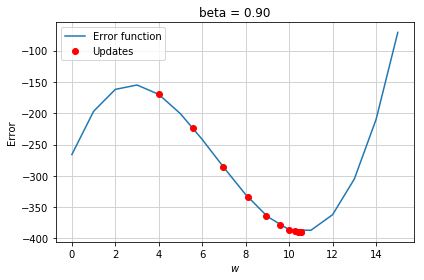

In [82]:
import math
import matplotlib.pyplot as plt
import numpy as np

#E(w)
def error(w):
    return np.multiply(-2, np.power(np.add(w, 5), 2)) + np.power(np.add(w, -6), 3)
#grad E(w)
def error_grad(w):
    return -4*(w+5)+3*(w-6)**2
#s(t)
def calc_s(beta, s, error_grad_w):
    return beta*s + (1-beta)*error_grad_w**2

def adaptive(eta, beta, epsilon, iterations): 
    w = [4]
    s = [0]
    
    for i in range(0, iterations+1):
        last_w = w[i]
        last_s = s[i]
        error_grad_last_w = error_grad(last_w)
             
        s.append(calc_s(beta, s[i], error_grad_last_w))
        w.append(last_w - eta* error_grad_last_w/(math.sqrt(s[i+1] + epsilon)))
    return w

def plot_adaptive(w, str):
    plt.title(str)
    plt.xlabel("$w$")
    plt.ylabel("Error")
    plt.grid(color='lightgrey', linestyle='-', linewidth=1)
    
    arr = np.arange(16)
    plt.plot(arr, error(arr), label='Error function')
    plt.plot(w, error(w), 'ro', color="red", label="Updates")
    
    plt.tight_layout()
    plt.legend()

it = 10
w = adaptive(0.5, 0.9, 0.00000001, it)
plot_adaptive(w, "beta = 0.90")

#### 2. Untersuchung des Faktors $\sqrt{s(t) + \epsilon}$
##### a) für jeden Fall bestimmen, ob das Problem gemildert oder verstärkt wird
| Problem | $\sqrt{s(t) + \epsilon} < 1$ | $\sqrt{s(t) + \epsilon} > 1$ |  
| - | - | - |  
| $vanishing$ $gradients$ | gemildert | verstärkt |  
| $exploding$ $gradients$ | verstärkt | gemildert |  

##### b) Argumentiere, warum die Fälle, in denen die Probleme sogar noch verstärkt werden, wahrscheinlich weniger häufig auftreten
Verstärkung des Problems bei vanishing gradients  
Gradient von E ist klein, d.h. $s(t) \approx \beta \cdot s(t-1)$ und für $\beta < 1$ wird s(t) somit immer kleiner und geht in den gemilderten Fall $s(t) < 1$ über.  
Verstärkung des Problems bei exploding gradients:  
Gradient von E ist groß, d.h. $s(t)$ wird immer größer und geht somit in den gemilderten Fall $s(t) > 1$ über.

#### 3. Untersuchung des Falls $\beta = 0$ (zudem gelte $\epsilon = 0$)
##### a) Formel für Gewichtsupdates für diesen Fall vereinfachen
$s(t) = \nabla E(w(t-1))^2$  
$w(t) = w(t-1) - \eta\cdot\frac{\nabla E(w(t-1))}{\sqrt{s(t)}} = w(t-1) - \eta\cdot\frac{\nabla E(w(t-1))}{|E(w(t-1))|} = w(t-1) - \eta\cdot sgn(E(w(t-1)))$
##### b) obige Grafik für diesen Fall anzeigen und Ergebnis interpretieren
Update-Punkte sind gleichmäßg verteilt, d.h. w wird jedes mal um den gleichen Wert ($\eta = 0,5$) erhöht.  
Dies passt auch zur obigen Formel für $w(t)$: Entweder wird $\eta$ vom voherigen Wert von $w$ abgezogen oder addiert.

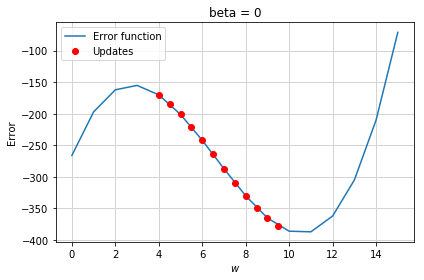

In [83]:
it = 10
w = adaptive(0.5, 0, 0, it)
plot_adaptive(w, "beta = 0")

##### c) Was sid die möglichen Richtungen, in die sich die Updates bewegen können?
Die einzelenen Komponenten von $w=(w_1, w_2)^T$ können sich jeweils nur auf einer Achse bewegen und zwar auf einer Graden mit Steigung $\eta$ durch ihren Startwert ($t=0$). Dadurch ergeben sich als Richtung für die Updates: Norden, Nord-Osten, Osten, Süd-Osten, Süden, Süd-Westen, Westen, Nord-Westen.
##### d) Nenn eine weiteres Optimierungsverfahren, das diesem Fall ähnlich ist
Resilent Backpropagation (RPROP)

#### 4. Untersuchung inwieweit adaptive learning reates das Update beeinflussen
##### a) Berechne $C_a(-2,2)$ für den Fall $\beta = 0$ ($\epsilon = 0$) 
$C_a(-2 , 2) = |\frac{2}{\sqrt{s(2) + 0}}| - |2| = |\frac{2}{\sqrt{g_2^2}}| - 2 = |\frac{2}{2}| - 2 = -1$
##### b) $C_a(g_1,g_2)$ für unterschiedliche Werte von $\beta$
###### i) Erkläre, wie aus der Grafik abegelesen werden kann, dass die Bedeutung der Magnitude für steigendes $\beta$ zunimmt
Je größer $\beta$ gewählt wird, desto größer ist $C_a(g_1,g_2)$ für alle $g_1, g_2$ und je größer $C_a(g_1,g_2)$, desto größer die Änderung und die Bedeutung der Magnitude des Gradienten.
###### ii) Erkläre, wie die Ergebnisse der Grafik mit den Normalisierungseingenschaften zusammenpassen
Setzt man z.B. $\beta = 0.9$, so sieht man in der Grafik, dass betragsmäig kleine $g_1$ verstärkt werden (rote Färbung in der Grafik) und betragsmäßig große $g_1$ abgeschwächt werden (blaue Färbung in der Grafik).

#### 5. verschiedene Pfade des Optimierungsverfahrens
##### a) Warum bewegt sich die $s_1$-Kurve mit steigendem $\beta$ weiter nach rechts und wird breiter?
Je größer $\beta$, desto größer ist der Einfluss von $s(t-1)$ und desto geringer der Einfluss von $\nabla E(w(t-1))$ auf $s(t)$. Die steigende Breite kann durch den steigenden Vorfaktor $\beta$ vor $s(t-1)$ erklärt werden. Nimmt nun der Einfluss von $\nabla E(w(t-1))$ auf $s(t)$ ab, so wird weniger hinzuaddiert und die Kurve verschiebt sich nach rechts. 
##### b) Warum liegt die $s_2$-Kurve größtenteils über der $s_1$-Kurve?
$\frac{\partial E}{\partial w_1} = 6\cdot w_1$   
$\frac{\partial E}{\partial w_2} = 20\cdot w_2$  
Daraus folgt, dass $\frac{\partial E}{\partial w_2} > \frac{\partial E}{\partial w_1}$ für $w_2 > 0,3\cdot w_1$ und je größer $\frac{\partial E}{\partial w_i}$, desto stärker steigt $s_i(t)$ an. Da zu Beginn $w_1 = -15$ und $w_2 = 20$ ($0,3\cdot w_1 = -4,5$), steigt $s_2$ deutlich stärker als $s_1$ und somit liegt die $s_2$-Kurve größtenteils über der $s_1$-Kurve.
##### c) Erkläre, warum der Pfad in diesem Beispiel zielstrebiger auf das Minimum zugeht.
Der Pfad geht zielstrebiger auf das Minimum zu, da die Magnitude des Gradienten mit $0,1$ skaliert wird und somit deren Einfluss abgeschwächt und die Probleme von exploding und vanishing gradients gemildert werden. Beim Momentum-Pfad wird die Magnitude des Gradienten mit $1$ skaliert und hat somit deutlich mehr Einfluss auf das Update als hier.
##### d) Finde eine neue Startposition, in der die $s_2$-Kurve größtenteils unterhalb der $s_1$-Kurve verläuft.
Startposition: $w_1 = 20$ und $w_2 = 2$